<a href="https://colab.research.google.com/github/herusy/Machine_Learning/blob/main/%D0%93%D0%B5%D1%80%D1%83%D1%81_%D0%BF%D1%80_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Герус Я.О. ФІТ 4-8

In [ ]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/titanic.csv'
df = pd.read_csv(file_path)

#1 Вивести перших 5 рядків.

df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#2 Визначити розмір датасета.
df.shape

(418, 12)

In [ ]:
#3 Визначити тип даних.
print("\nТипи даних стовпців:\n", df.dtypes)


Типи даних стовпців:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
#4 Визначити наявність пропущених значень. При наявності, замінити
#пропущені значення на середнє значення.

print("Пропущені значення в кожному стовпці:\n", df.isnull().sum())

df = df.fillna(df.mean(numeric_only=True))

Пропущені значення в кожному стовпці:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [ ]:
#5 Ще раз перевірити наявність пропущених значень.

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#6 Перевірити наявність дублікатів. При наявності видалити дублікати.

print(f"Кількість дублікатів у датасеті: {df.duplicated().sum()}")

Кількість дублікатів у датасеті: 0


In [ ]:
#7 Вивести описову статистику датасету describe()

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#8 Видалити стовпчик Cabin

df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
#9 Сформувати датасет з обраними стовпцями:
 #['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [ ]:
#10 Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні
#значення даного стовпчика).

df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}).astype(int)
df.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
Fare,float64


In [ ]:
#11 Ще раз перевірити кількість пропущених даних (впевнитись, що їх немає).

df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


In [ ]:
#12 Вивести 5 перших рядків датасету.

df.head(5)

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,34.5,7.8292
1,1,3,1,47.0,7.0000
2,0,2,0,62.0,9.6875
3,0,3,0,27.0,8.6625
4,1,3,1,22.0,12.2875


In [ ]:
#13 Вивести 5 останніх рядків датасету.

df.tail(5)

,Survived,Pclass,Sex,Age,Fare
413,0,3,0,30.27259,8.0500
414,1,1,1,39.00000,108.9000
415,0,3,0,38.50000,7.2500
416,0,3,0,30.27259,8.0500
417,0,3,0,30.27259,22.3583


In [ ]:
#14 Аналіз виживання залежно від статі: Обчисліть відсоток виживання
#для кожної статі. Чи була різниця у виживанні між чоловіками та жінками?

survival_rate_by_gender = df.groupby('Sex')['Survived'].mean() * 100

print(survival_rate_by_gender)


Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


Відсоток виживання серед жінок становить 100%, що означає, що всі жінки вижилиб, тоді як відсоток виживання серед чоловіків становить 0%, тобто жоден чоловік не вижив.

In [ ]:
#15 Обчисліть відсоток виживання для кожного класу (Pclass). Який
#клас мав найвищий рівень виживання (дати відповідь)?

survival_rates_by_class = df.groupby('Pclass')['Survived'].mean() * 100

print(survival_rates_by_class)


Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


Відсоток виживання за класами:
1 клас: 46.7%
2 клас: 32.3%
3 клас: 33.0%
Найвищий рівень виживання мали пасажири першого класу з відсотком виживання 46.7%.

In [ ]:
#16 Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи
#впливає вік на виживання (дати відповідь)?

average_age_survived = df[df['Survived'] == 1]['Age'].mean()
average_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

print(f"Середній вік тих, хто вижив: {average_age_survived:.2f} років")
print(f"Середній вік тих, хто не вижив: {average_age_not_survived:.2f} років")


Середній вік тих, хто вижив: 30.27 років
Середній вік тих, хто не вижив: 30.27 років


Згідно з отриманими даними, середній вік пасажирів, які вижили, і тих, хто не вижив, становить 30.27 років, що свідчить про те, що шанси на виживання були однаковими для молодших і старших пасажирів.

In [ ]:
#17 Розподіліть пасажирів на групи за рівнями тарифів (Fare) і
#обчисліть рівень виживання для кожної групи. Як тариф впливав на
#шанси виживання (дати відповідь)?

fare_bins = [0, 7.91, 14.454, 31, 512]
fare_labels = ['Low', 'Medium', 'High', 'Very High']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)

survival_rates_by_fare_group = df.groupby('FareGroup', observed=False)['Survived'].mean() * 100

print("Рівень виживання для кожної групи тарифів:")
print(survival_rates_by_fare_group)


Рівень виживання для кожної групи тарифів:
FareGroup
Low          26.785714
Medium       26.881720
High         41.176471
Very High    50.000000
Name: Survived, dtype: float64


Відсоток виживання найвищий у пасажирів, які придбали квитки за найвищими тарифами і складає 50%.  

In [ ]:
#18 Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного класу
#(Pclass). Чи існує значна різниця у тарифах між класами (дати відповідь)?

average_fare_per_class = df.groupby('Pclass')['Fare'].mean()

print(average_fare_per_class)


Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


Так, існує різниця у тарифах між класами. Перший клас має значно вищий середній тариф порівняно з другим і третім класами.

In [ ]:
#19 Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік
#пасажирів розподіляється за класами (дати відповідь)?

average_age_per_class = df.groupby('Pclass')['Age'].mean()

print(average_age_per_class)


Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64


Пасажири першого класу в середньому старші, ніж пасажири другого та третього класів.

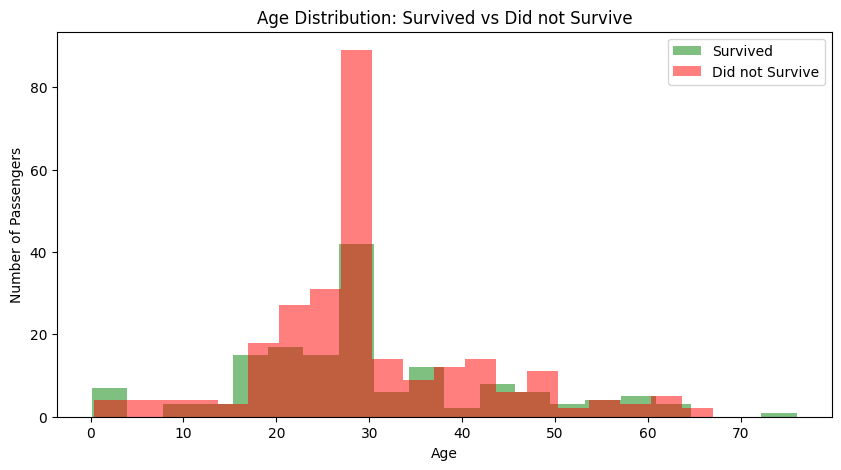

In [ ]:
#20 Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто не вижив.
#Чи є видимі відмінності у вікових групах (дати відповідь)?

plt.figure(figsize=(10,5))
df[df['Survived'] == 1]['Age'].plot(kind='hist', bins=20, alpha=0.5, color='green', label='Survived')

df[df['Survived'] == 0]['Age'].plot(kind='hist', bins=20, alpha=0.5, color='red', label='Did not Survive')

plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution: Survived vs Did not Survive')
plt.legend()
plt.show()

Гістограма показує, що серед тих, хто вижив, було більше дітей та молодих людей, але й також, багато молодих людей серед тих, хто не вижив.

In [ ]:
#21 Обчисліть відсоток виживання для кожної комбінації статі та класу
#(наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група
#мала найвищий рівень виживання (дати відповідь)?

survival_rates = df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

print(survival_rates)


Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64


In [ ]:
#22 Обчисліть кореляцію між усіма числовими змінними (Survived,
#Pclass, Age, Fare). Які змінні найбільш сильно корелюють з
#виживанням (дати відповідь)?

correlation_matrix = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()

print(correlation_matrix)


          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000


З аналізу кореляції видно, що найсильніша позитивна кореляція з виживанням спостерігається у змінної Fare (0.191), а найсильніша негативна кореляція з виживанням у змінної Pclass (-0.109). Це означає, що пасажири, які заплатили більше за квитки, мали більші шанси на виживання, а пасажири з вищими класами мали більшу ймовірність вижити.

*Висновок*: аналіз даних виявив, що всі жінки вижили, що свідчить про високі шанси на виживання для жінок, тоді як жоден з чоловіків не вижив. Що стосується класів, пасажири першого класу мали найвищі шанси на виживання, з відсотком виживання 46.7%, тоді як відсоток виживання для другого і третього класів був значно нижчий, становлячи 32.3% та 33.0% відповідно. Аналіз тарифів показав, що пасажири, які заплатили більше за квитки, мали вищі шанси на виживання, з відсотком виживання 50% для найвищих тарифів.